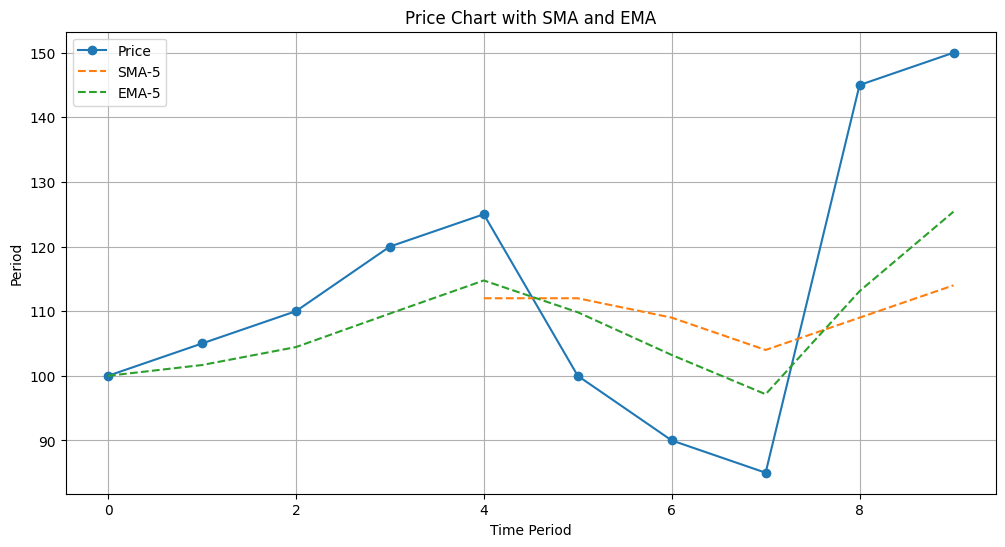

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample price data
prices = [100, 105, 110, 120, 125, 100, 90, 85, 145, 150]


# Calculate SMA and EMA
window = 5
sma = pd.Series(prices).rolling(window=window).mean()
ema = pd.Series(prices).ewm(span=window, adjust=False).mean()


# Plot the original prices and moving averages
plt.figure(figsize=(12,6))
plt.plot(prices, label='Price', marker='o')
plt.plot(sma, label=f'SMA-{window}', linestyle='--')
plt.plot(ema, label=f'EMA-{window}', linestyle='--')

plt.title('Price Chart with SMA and EMA')
plt.xlabel('Time Period')
plt.ylabel('Period')
plt.legend()
plt.grid(True)


plt.show()

In [1]:
import yfinance as yf
data = yf.download(tickers='BTC-USD', period='max', interval='1d')
data = data.xs("BTC-USD", axis=1, level="Ticker")

/var/folders/ln/sphck21d1ldb9687pbhzy38c0000gn/T/ipykernel_9594/1281294406.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers='BTC-USD', period='max', interval='1d')
[*********************100%***********************]  1 of 1 completed


In [2]:
import pandas_ta as ta
data.ta.adx(high='High', low='Low', close='Close', length=14, append=True)

,ADX_14,ADXR_14_2,DMP_14,DMN_14
Date,,,,
2014-09-17,NaN,NaN,NaN,NaN
2014-09-18,NaN,NaN,NaN,NaN
2014-09-19,NaN,NaN,NaN,NaN
2014-09-20,NaN,NaN,NaN,NaN
2014-09-21,NaN,NaN,NaN,NaN
...,...,...,...,...
2025-11-12,28.990189,28.493846,13.264829,29.164659
2025-11-13,30.119287,29.228456,11.854901,31.095747
2025-11-14,31.759686,30.374937,10.676118,34.836348


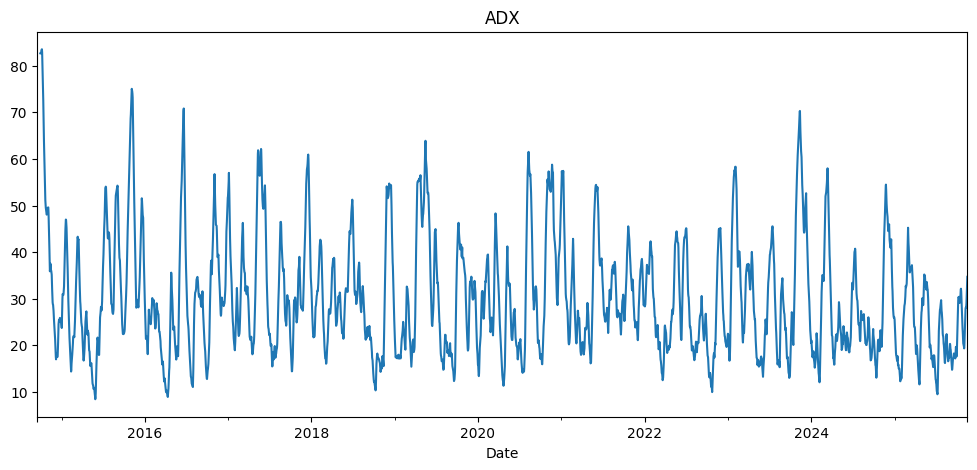

In [7]:
plt.figure(figsize=(12,5))
plt.title('ADX')
data['ADX_14'].plot()
plt.show()

In [10]:
import plotly.io as pio
pio.renderers.default = "browser"

In [13]:
import plotly.graph_objects as go
df = data[:-500]
fig = go.Figure(
    data = [
        go.Candlestick(x=df.index, low=df['Low'], open=df['Open'], close=df['Close'], high=df['High'], name='OHLC'),
        go.Scatter(x=df.index, y=df['ADX_14'], name='ADX', yaxis='y2')
    ]
)

fig.update_layout(
    title='OHLC with ADX(14)',
    yaxis2=dict(
        domain=[0,0.2],
        anchor='free',
        overlaying='y',
        side='right',
        title='ADX'
    )
)

fig.show()

In [12]:
import plotly.graph_objects as go
df = data[:500]
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],
                name='OHLC'),
                go.Scatter(x=df.index, y=df['ADX_14'], name='ADX', yaxis='y2')
                ])

fig.update_layout(
    title='OHLC with ADX(14)',
    yaxis=dict(
        domain=[0.2, 1]
    ),
    yaxis2=dict(
        domain=[0, 0.2],
        anchor='free',
        overlaying='y',
        side='right',
        title='ADX'
    ))

fig.show()
